In [44]:
from pydantic import BaseModel, Field
from langchain_core.messages import (
    AIMessage, 
    HumanMessage,
    SystemMessage,
    BaseMessage
)
from Nodes.load_xml_instructions import load_xml_instructions
from Classes.llm_classes import *
from Classes.state_classes import SpecializedComponentState

class ComponentConfig(BaseModel):
    config : dict

def component_selector(state: SpecializedComponentState):
    ctype = state["component"].get("type", "").lower()
    selected_node = "generate_generic_component"

    if ctype == "chart":
        selected_node = "generate_chart_component"
    elif ctype == "reporttable":
        selected_node = "generate_table_component"
    elif ctype == "waterfall":
        selected_node = "generate_waterfall_component"
    elif ctype == "tile":
        selected_node = "generate_tile_component"
    
    # Update the state with the selected node
    state["selected_node"] = selected_node
    return state  # Return the full updated state
    
def selector_routing(state: SpecializedComponentState):
    """
    Return the node name chosen by 'component_selector'.
    The possible values are:
    - 'generate_chart_component'
    - 'generate_table_component'
    - 'generate_waterfall_component'
    - 'generate_tile_component'
    - 'generate_generic_component'
    """
    return state["selected_node"]



def _base_component_generation(component: dict, system_instructions_file: str) -> dict:
    """
    Common logic that calls an LLM to produce a configuration for *any* type of component.
    We just vary the system instruction file to tailor the generation.
    """
    ai_description = component.get("AI_Generation_Description", None)
    ai_description = ai_description.strip() if isinstance(ai_description, str) else ai_description
    if not ai_description:
        # If there's no AI Generation Description, just return an empty config
        return {}

    system_instructions = load_xml_instructions(system_instructions_file)
    system_msg = SystemMessage(content=system_instructions)
    user_msg = HumanMessage(content=ai_description)

    structured_llm = modelVers.with_structured_output(
        ComponentConfig,
        method="json_mode",
        include_raw=True
    )

    conversation = [system_msg, user_msg]
    output = structured_llm.invoke(conversation, stream=False, response_format="json")

    parsed_output = output["parsed"]
    if parsed_output:
        return parsed_output.model_dump()  # returns a dict
    else:
        return {}


# CHART
def generate_chart_component(state: SpecializedComponentState):
    """
    Specialized node for chart components
    """
    component = state["component"]
    component_id = component.get("id", "NoId")

    # Use a chart-specific system instructions file
    specialized_config = _base_component_generation(
        component=component,
        system_instructions_file="component_chart_gen.xml"
    )

    generated_config = {
        "id": component_id,
        "generatedConfig": specialized_config
    }
    return {"JsonLayoutWithComponentConfig": [generated_config]}


# TABLE
def generate_table_component(state: SpecializedComponentState):
    component = state["component"]
    component_id = component.get("id", "NoId")

    specialized_config = _base_component_generation(
        component=component,
        system_instructions_file="component_table_gen.xml"
    )

    generated_config = {
        "id": component_id,
        "generatedConfig": specialized_config
    }
    return {"JsonLayoutWithComponentConfig": [generated_config]}


def generate_waterfall_component(state: SpecializedComponentState):
    component = state["component"]
    component_id = component.get("id", "NoId")

    specialized_config = _base_component_generation(
        component=component,
        system_instructions_file="component_waterfall_gen.xml"
    )

    generated_config = {
        "id": component_id,
        "generatedConfig": specialized_config
    }
    return {"JsonLayoutWithComponentConfig": [generated_config]}


def generate_tile_component(state: SpecializedComponentState):
    component = state["component"]
    component_id = component.get("id", "NoId")

    specialized_config = _base_component_generation(
        component=component,
        system_instructions_file="component_tile_gen.xml"
    )

    generated_config = {
        "id": component_id,
        "generatedConfig": specialized_config
    }
    return {"JsonLayoutWithComponentConfig": [generated_config]}


def generate_generic_component(state: SpecializedComponentState):
    """
    Fallback if component type is unrecognized. 
    Reuses the original 'component_content_gen.xml' instructions.
    """
    component = state["component"]
    component_id = component.get("id", "NoId")

    specialized_config = _base_component_generation(
        component=component,
        system_instructions_file="component_content_gen.xml"
    )

    generated_config = {
        "id": component_id,
        "generatedConfig": specialized_config
    }
    return {"JsonLayoutWithComponentConfig": [generated_config]}



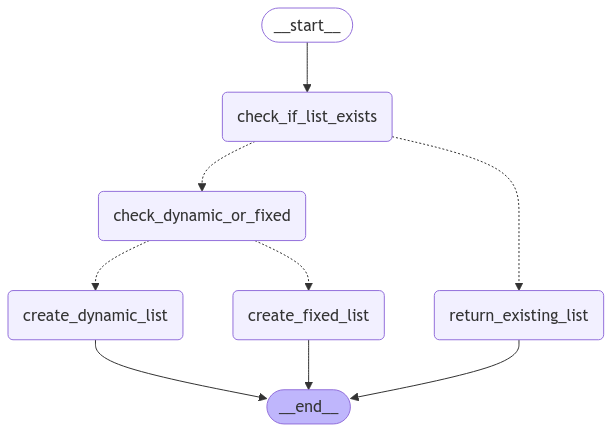

In [45]:
from IPython.display import Image
Image(generate_list_subchart.get_graph().draw_mermaid_png())

In [47]:
from langgraph_sdk import get_client

# client = get_client(url="https://ht-slight-sweatsuit-3-df87923968b55e13a1e23870135d14c8.us.langgraph.app", api_key="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")

input_data ={
    "ReportQuery": "Create a report showing the profit and loss in a table comparing actuals to budget. Next to the table I want to see a chart with 12 periods comparing Actuals to Budget for the current selected row in the table. Below the chart I want to see a small table breaking down the current selected line in to the product dimension.",
    "ReportMetadata=": [{"name":"Category","alias":"Category","order":3,"default":"Actual","visible":False,"dimensionContent":[{"ID":1,"Name":"Actual"},{"ID":2,"Name":"Budget"},{"ID":3,"Name":"Forecast Jun"}]},{"name":"Year","alias":"Year","order":1,"default":2024,"visible":True,"dimensionContent":[{"ID":1,"Name":"2023"},{"ID":2,"Name":"2024"},{"ID":3,"Name":"2025"},{"ID":4,"Name":"2026"}]},{"name":"Period","alias":"Period","order":2,"default":"Oct","visible":True,"dimensionContent":[{"ID":1,"Name":"Jan","ParentID":13,"Order":1},{"ID":2,"Name":"Feb","ParentID":13,"Order":2},{"ID":3,"Name":"Mar","ParentID":13,"Order":3},{"ID":4,"Name":"Apr","ParentID":14,"Order":4},{"ID":5,"Name":"May","ParentID":14,"Order":5},{"ID":6,"Name":"Jun","ParentID":14,"Order":6},{"ID":7,"Name":"Jul","ParentID":15,"Order":7},{"ID":8,"Name":"Aug","ParentID":15,"Order":8},{"ID":9,"Name":"Sep","ParentID":15,"Order":9},{"ID":10,"Name":"Oct","ParentID":16,"Order":10},{"ID":11,"Name":"Nov","ParentID":16,"Order":11},{"ID":12,"Name":"Dec","ParentID":16,"Order":12},{"ID":13,"Name":"Q1","ParentID":17,"Order":3},{"ID":14,"Name":"Q2","ParentID":17,"Order":6},{"ID":15,"Name":"Q3","ParentID":17,"Order":9},{"ID":16,"Name":"Q4","ParentID":17,"Order":12},{"ID":17,"Name":"Full Year","ParentID":{},"Order":12}]},{"name":"View","alias":"View","order":2,"default":"Periodic","visible":True,"dimensionContent":[{"ID":1,"Name":"Periodic"},{"ID":2,"Name":"YTD"}]},{"name":"Account","alias":"Account","order":6,"default":"Gross Sales","visible":False,"dimensionContent":[{"ID":1059,"Name":"Depreciation IFRS16","ParentID":{},"Valuation":"positive"},{"ID":1060,"Name":"Interest on term loan","ParentID":1332,"Valuation":"positive"},{"ID":1061,"Name":"Foreign exchange gain/loss","ParentID":1332,"Valuation":"positive"},{"ID":1062,"Name":"Other cost of goods sold","ParentID":1333,"Valuation":"positive"},{"ID":1063,"Name":"Others","ParentID":1330,"Valuation":"positive"},{"ID":1064,"Name":"Depreciation","ParentID":1332,"Valuation":"positive"},{"ID":1065,"Name":"General Office Supplies","ParentID":1330,"Valuation":"positive"},{"ID":1066,"Name":"Advertising and marketing","ParentID":1331,"Valuation":"positive"},{"ID":1067,"Name":"Delivery expenses - Fulfillment Cost ","ParentID":1325,"Valuation":"positive"},{"ID":1068,"Name":"Insurance","ParentID":1329,"Valuation":"positive"},{"ID":1069,"Name":"Internet and Phone","ParentID":1330,"Valuation":"positive"},{"ID":1070,"Name":"Service Charges","ParentID":1329,"Valuation":"positive"},{"ID":1071,"Name":"Discounts","ParentID":1323,"Valuation":"positive"},{"ID":1072,"Name":"Direct Staff costs others","ParentID":1333,"Valuation":"positive"},{"ID":1073,"Name":"Rent - IFRS16","ParentID":{},"Valuation":"positive"},{"ID":1074,"Name":"Interest on term loan - IFRS16","ParentID":{},"Valuation":"positive"},{"ID":1075,"Name":"Aggregator Fees","ParentID":1325,"Valuation":"positive"},{"ID":1076,"Name":"Legal and professional services","ParentID":1330,"Valuation":"positive"},{"ID":1077,"Name":"Transportation expenses","ParentID":1330,"Valuation":"positive"},{"ID":1078,"Name":"Other sales","ParentID":1322,"Valuation":"positive"},{"ID":1079,"Name":"Staff costs salaries and wages","ParentID":1327,"Valuation":"positive"},{"ID":1080,"Name":"Charges on Credit Card Sales","ParentID":1325,"Valuation":"positive"},{"ID":1081,"Name":"Electricity and Cooling","ParentID":1329,"Valuation":"positive"},{"ID":1082,"Name":"Rent","ParentID":1329,"Valuation":"positive"},{"ID":1083,"Name":"Direct Staff costs salaries and wages","ParentID":1333,"Valuation":"positive"},{"ID":1084,"Name":"Extraordinary Expense","ParentID":1332,"Valuation":"positive"},{"ID":1085,"Name":"Online sales","ParentID":1322,"Valuation":"positive"},{"ID":1086,"Name":"Cost of goods sold","ParentID":1324,"Valuation":"positive"},{"ID":1087,"Name":"Staff costs others","ParentID":1327,"Valuation":"positive"},{"ID":1088,"Name":"Purchase discount","ParentID":1324,"Valuation":"positive"},{"ID":1089,"Name":"Inventory Adjustment","ParentID":1333,"Valuation":"positive"},{"ID":1090,"Name":"Bank charges","ParentID":1330,"Valuation":"positive"},{"ID":1171,"Name":"Deprecation - ROU Asset","ParentID":1059,"Valuation":"positive"},{"ID":1172,"Name":"Interest on Term Deposit","ParentID":1060,"Valuation":"positive"},{"ID":1173,"Name":"Realized Foreign exchange gains and losses","ParentID":1061,"Valuation":"positive"},{"ID":1174,"Name":"COGS - Other Sales","ParentID":1062,"Valuation":"positive"},{"ID":1175,"Name":"COGS- Cafe","ParentID":1062,"Valuation":"positive"},{"ID":1176,"Name":"Delivery Expenses, purchases","ParentID":1062,"Valuation":"positive"},{"ID":1177,"Name":"Direct Cost Applied","ParentID":1062,"Valuation":"positive"},{"ID":1178,"Name":"Direct Cost Applied, Rawmat.","ParentID":1062,"Valuation":"positive"},{"ID":1179,"Name":"Disc. Received, Raw Materials","ParentID":1062,"Valuation":"positive"},{"ID":1180,"Name":"Other Purchase Cost","ParentID":1062,"Valuation":"positive"},{"ID":1181,"Name":"Packing Materials","ParentID":1062,"Valuation":"positive"},{"ID":1182,"Name":"Purch., Raw Materials - Dom.","ParentID":1062,"Valuation":"positive"},{"ID":1183,"Name":"Purchase - Discount","ParentID":1062,"Valuation":"positive"},{"ID":1184,"Name":"Purchases- Inventory","ParentID":1062,"Valuation":"positive"},{"ID":1185,"Name":"Purchases- Services","ParentID":1062,"Valuation":"positive"},{"ID":1186,"Name":"Shop Use - Aquatics (only)","ParentID":1062,"Valuation":"positive"},{"ID":1187,"Name":"Shop Use - Grooming","ParentID":1062,"Valuation":"positive"},{"ID":1188,"Name":"STOCK WRITE OFF- Damaged/shop use/write off","ParentID":1062,"Valuation":"positive"},{"ID":1189,"Name":"Business Entertainment & meetings","ParentID":1063,"Valuation":"positive"},{"ID":1190,"Name":"Cash Discrepancies","ParentID":1063,"Valuation":"positive"},{"ID":1191,"Name":"Cleaning","ParentID":1063,"Valuation":"positive"},{"ID":1192,"Name":"Consultancy fee- Petsville","ParentID":1063,"Valuation":"positive"},{"ID":1193,"Name":"Misc Income / Other income","ParentID":1063,"Valuation":"positive"},{"ID":1194,"Name":"Miscellaneous Expenses","ParentID":1063,"Valuation":"positive"},{"ID":1195,"Name":"Other Income from Petsville Luxury Others","ParentID":1063,"Valuation":"positive"},{"ID":1196,"Name":"Other Losses","ParentID":1063,"Valuation":"positive"},{"ID":1197,"Name":"Vehicle Repairs and Maintenance  (P&M,MGRM)","ParentID":1063,"Valuation":"positive"},{"ID":1198,"Name":"Amortization, Software Cost","ParentID":1064,"Valuation":"positive"},{"ID":1199,"Name":"Amortization, Trade Mark/Logo","ParentID":1064,"Valuation":"positive"},{"ID":1200,"Name":"Depreciation - Leasehold Improvement","ParentID":1064,"Valuation":"positive"},{"ID":1201,"Name":"Depreciation, Equipment","ParentID":1064,"Valuation":"positive"},{"ID":1202,"Name":"Depreciation, Furniture & Fixture","ParentID":1064,"Valuation":"positive"},{"ID":1203,"Name":"Depreciation, Vehicles","ParentID":1064,"Valuation":"positive"},{"ID":1204,"Name":"Kitchen & Other Sanitary Supplies","ParentID":1065,"Valuation":"positive"},{"ID":1205,"Name":"Office & Shop Supplies","ParentID":1065,"Valuation":"positive"},{"ID":1206,"Name":"Office and shop Supplies","ParentID":1065,"Valuation":"positive"},{"ID":1207,"Name":"Marketing, Promotions & E-Commerce","ParentID":1066,"Valuation":"positive"},{"ID":1208,"Name":"Shop Use - Marketing/FAHM","ParentID":1066,"Valuation":"positive"},{"ID":1209,"Name":"Gasoline and Motor Oil (Fuel)","ParentID":1067,"Valuation":"positive"},{"ID":1210,"Name":"Last Mile - Insurance","ParentID":1067,"Valuation":"positive"},{"ID":1211,"Name":"Last Mile - Parking Expenses","ParentID":1067,"Valuation":"positive"},{"ID":1212,"Name":"Last Mile - RTA Fines","ParentID":1067,"Valuation":"positive"},{"ID":1213,"Name":"Last Mile - Salik","ParentID":1067,"Valuation":"positive"},{"ID":1214,"Name":"Outsource Delivery Charges","ParentID":1067,"Valuation":"positive"},{"ID":1215,"Name":"Vehicle Leasing ","ParentID":1067,"Valuation":"positive"},{"ID":1216,"Name":"Vehicle Registration Fees","ParentID":1067,"Valuation":"positive"},{"ID":1217,"Name":"Vehicle Repairs and Maintenance","ParentID":1067,"Valuation":"positive"},{"ID":1218,"Name":"Insurance - Building/Shop ","ParentID":1068,"Valuation":"positive"},{"ID":1219,"Name":"Internet & Phone/Mobile Cards","ParentID":1069,"Valuation":"positive"},{"ID":1220,"Name":"General Maintenance","ParentID":1070,"Valuation":"positive"},{"ID":1221,"Name":"Rent -chiller and Service charges 2023","ParentID":1070,"Valuation":"positive"},{"ID":1222,"Name":"Repairs and Maintenance - General","ParentID":1070,"Valuation":"positive"},{"ID":1223,"Name":"Service/Chiller Charges - Long term","ParentID":1070,"Valuation":"positive"},{"ID":1224,"Name":"Discount -  Trade Sales & Services(Item discounts)","ParentID":1071,"Valuation":"positive"},{"ID":1225,"Name":"Discount - B2B Rebates","ParentID":1071,"Valuation":"positive"},{"ID":1226,"Name":"Discount - Suppliers Promotions support","ParentID":1071,"Valuation":"positive"},{"ID":1227,"Name":"Discount Granted-Web/others(promo/coupons)","ParentID":1071,"Valuation":"positive"},{"ID":1228,"Name":"Discount Loyalty Provision","ParentID":1071,"Valuation":"positive"},{"ID":1229,"Name":"Discounts- Cafe'","ParentID":1071,"Valuation":"positive"},{"ID":1230,"Name":"Gift Card/Coupon/Winning Vouchers","ParentID":1071,"Valuation":"positive"},{"ID":1231,"Name":"Loyality Points - Redemption","ParentID":1071,"Valuation":"positive"},{"ID":1232,"Name":"Waive Off/Discount by CS (Online Sales)","ParentID":1071,"Valuation":"positive"},{"ID":1233,"Name":"Bonus Expense","ParentID":1072,"Valuation":"positive"},{"ID":1234,"Name":"Employee Air Ticket Expense","ParentID":1072,"Valuation":"positive"},{"ID":1235,"Name":"Employee Air Ticket Expense-Direct","ParentID":1072,"Valuation":"positive"},{"ID":1236,"Name":"Gratuity Expense","ParentID":1072,"Valuation":"positive"},{"ID":1237,"Name":"Gratuity Expense-Direct","ParentID":1072,"Valuation":"positive"},{"ID":1238,"Name":"Health Insurance & Medical Expense-Direct","ParentID":1072,"Valuation":"positive"},{"ID":1239,"Name":"Health Insurance Expense","ParentID":1072,"Valuation":"positive"},{"ID":1240,"Name":"Leaves Salary & Vacation Compensation","ParentID":1072,"Valuation":"positive"},{"ID":1241,"Name":"Leaves Salary & Vacation Compensation-Direct","ParentID":1072,"Valuation":"positive"},{"ID":1242,"Name":"Other employee benefits-Direct","ParentID":1072,"Valuation":"positive"},{"ID":1243,"Name":"Salaries - Notice/Final Settlement-Direct","ParentID":1072,"Valuation":"positive"},{"ID":1244,"Name":"Sales Incentive ","ParentID":1072,"Valuation":"positive"},{"ID":1245,"Name":"Staff Training and Entertainment-Direct","ParentID":1072,"Valuation":"positive"},{"ID":1246,"Name":"Visa Application Expenses","ParentID":1072,"Valuation":"positive"},{"ID":1247,"Name":"Visa Expenses (Application/Cancellation)-Direct","ParentID":1072,"Valuation":"positive"},{"ID":1248,"Name":"Rent -IFRS 16 REversal","ParentID":1073,"Valuation":"positive"},{"ID":1249,"Name":"Finance cost - IFRS 16","ParentID":1074,"Valuation":"positive"},{"ID":1250,"Name":"Affiliate Service Charges (Instashop,El Grocer,Swan etc...)","ParentID":1075,"Valuation":"positive"},{"ID":1251,"Name":"Prof fees- PRO &Registration Fees","ParentID":1076,"Valuation":"positive"},{"ID":1252,"Name":"Professional Fees","ParentID":1076,"Valuation":"positive"},{"ID":1253,"Name":"Recruitment expenses","ParentID":1076,"Valuation":"positive"},{"ID":1254,"Name":"Transportation - Employees","ParentID":1077,"Valuation":"positive"},{"ID":1255,"Name":"Affiliate Service Fees (Instashop, El Grocer etc....)","ParentID":1078,"Valuation":"positive"},{"ID":1256,"Name":"Listing Fees Other sales","ParentID":1078,"Valuation":"positive"},{"ID":1257,"Name":"Shipping charges","ParentID":1078,"Valuation":"positive"},{"ID":1258,"Name":"Salaries & Wages-Indirect","ParentID":1079,"Valuation":"positive"},{"ID":1259,"Name":"Salaries and Wages- Outsourced","ParentID":1079,"Valuation":"positive"},{"ID":1260,"Name":"Amazone Delivery Fees/Charges","ParentID":1080,"Valuation":"positive"},{"ID":1261,"Name":"Credit Card & Other Charges","ParentID":1080,"Valuation":"positive"},{"ID":1262,"Name":"Credit Card Charges","ParentID":1080,"Valuation":"positive"},{"ID":1263,"Name":"Electricity and Cooling (Utilities)","ParentID":1081,"Valuation":"positive"},{"ID":1264,"Name":"Other Income from Petsville Luxury Electricity and Cooling","ParentID":1081,"Valuation":"positive"},{"ID":1265,"Name":"Rent - Shops/ Warehouse","ParentID":1082,"Valuation":"positive"},{"ID":1266,"Name":"Rent Income","ParentID":1082,"Valuation":"positive"},{"ID":1267,"Name":"Rent -shop/ warehouse short term","ParentID":1082,"Valuation":"positive"},{"ID":1268,"Name":"Rent- Shops/ Warehouse","ParentID":1082,"Valuation":"positive"},{"ID":1269,"Name":"Rent- Turnover Adjustment","ParentID":1082,"Valuation":"positive"},{"ID":1270,"Name":"Overtime / Lieu day-Drect","ParentID":1083,"Valuation":"positive"},{"ID":1271,"Name":"Overtime Expense","ParentID":1083,"Valuation":"positive"},{"ID":1272,"Name":"Salaries","ParentID":1083,"Valuation":"positive"},{"ID":1273,"Name":"Salaries & Wages-Direct","ParentID":1083,"Valuation":"positive"},{"ID":1274,"Name":"Dividend Received","ParentID":1084,"Valuation":"positive"},{"ID":1275,"Name":"Extraordinary Expenses","ParentID":1084,"Valuation":"positive"},{"ID":1276,"Name":"Extraordinary Income","ParentID":1084,"Valuation":"positive"},{"ID":1277,"Name":"Old Entries","ParentID":1084,"Valuation":"positive"},{"ID":1278,"Name":"Profits on Sales of Fixed Assets","ParentID":1084,"Valuation":"positive"},{"ID":1279,"Name":"Other - Sales","ParentID":1085,"Valuation":"positive"},{"ID":1280,"Name":"Service - Mobile Grooming","ParentID":1085,"Valuation":"positive"},{"ID":1281,"Name":"Service - Petrelocation","ParentID":1085,"Valuation":"positive"},{"ID":1282,"Name":"Shop - Sales","ParentID":1085,"Valuation":"positive"},{"ID":1283,"Name":"Shop Sales- Cafe'","ParentID":1085,"Valuation":"positive"},{"ID":1284,"Name":"Trade Sales & Services","ParentID":1085,"Valuation":"positive"},{"ID":1285,"Name":"COGS - Trade Sales & Services","ParentID":1086,"Valuation":"positive"},{"ID":1286,"Name":"Employee Air Ticket Expense-Indirect","ParentID":1087,"Valuation":"positive"},{"ID":1287,"Name":"Employee Uniforms","ParentID":1087,"Valuation":"positive"},{"ID":1288,"Name":"GPSSA PENSION EXPENSE -INDIRECT","ParentID":1087,"Valuation":"positive"},{"ID":1289,"Name":"Gratuity Expense-Indirect","ParentID":1087,"Valuation":"positive"},{"ID":1290,"Name":"Health Insurance & Medical Expense-Indirect","ParentID":1087,"Valuation":"positive"},{"ID":1291,"Name":"Leaves Salary & Vacation Compensation-Indirect","ParentID":1087,"Valuation":"positive"},{"ID":1292,"Name":"Management bonus","ParentID":1087,"Valuation":"positive"},{"ID":1293,"Name":"Other employee benefits-Indirect","ParentID":1087,"Valuation":"positive"},{"ID":1294,"Name":"Overtime / Lieu day-Indirect","ParentID":1087,"Valuation":"positive"},{"ID":1295,"Name":"Salaries - Notice/Final Settlement-Indirect","ParentID":1087,"Valuation":"positive"},{"ID":1296,"Name":"Staff Training and Entertainment-Indirect","ParentID":1087,"Valuation":"positive"},{"ID":1297,"Name":"Visa Expenses (Application/Cancellation)-Indirect","ParentID":1087,"Valuation":"positive"},{"ID":1298,"Name":"Listing Fees Purchase discount","ParentID":1088,"Valuation":"positive"},{"ID":1299,"Name":"Supplier Discounts and Rebates","ParentID":1088,"Valuation":"positive"},{"ID":1300,"Name":"Audit Roll Adjustments (Inv. Adjustments)","ParentID":1089,"Valuation":"positive"},{"ID":1301,"Name":"Inventory Adjmt. (Effect of Physical Count & Jnl.)","ParentID":1089,"Valuation":"positive"},{"ID":1302,"Name":"Inventory Adjsutment - effect of stock take","ParentID":1089,"Valuation":"positive"},{"ID":1303,"Name":"Inventory Adjsutment- POS / Sales orders","ParentID":1089,"Valuation":"positive"},{"ID":1304,"Name":"Inventory Costing Adjustment – Conversions","ParentID":1089,"Valuation":"positive"},{"ID":1305,"Name":"Other Gain/Loss (Inv. Rnd)","ParentID":1089,"Valuation":"positive"},{"ID":1306,"Name":"Stock Write Off  - Contamination","ParentID":1089,"Valuation":"positive"},{"ID":1307,"Name":"Stock Write Off  - Dented","ParentID":1089,"Valuation":"positive"},{"ID":1308,"Name":"Stock Write Off  - Leakage","ParentID":1089,"Valuation":"positive"},{"ID":1309,"Name":"Stock Write Off  - Manufacturing Defect","ParentID":1089,"Valuation":"positive"},{"ID":1310,"Name":"Stock Write Off  - Missing Parts","ParentID":1089,"Valuation":"positive"},{"ID":1311,"Name":"Stock Write Off  - Old Display Model","ParentID":1089,"Valuation":"positive"},{"ID":1312,"Name":"Stock Write Off  - Packing Defect","ParentID":1089,"Valuation":"positive"},{"ID":1313,"Name":"Stock Write Off  - Rat Infested","ParentID":1089,"Valuation":"positive"},{"ID":1314,"Name":"Stock Write Off  - Rusted","ParentID":1089,"Valuation":"positive"},{"ID":1315,"Name":"Stock Write Off  - Scratched","ParentID":1089,"Valuation":"positive"},{"ID":1316,"Name":"Stock Write Off  - Tearing","ParentID":1089,"Valuation":"positive"},{"ID":1317,"Name":"Stock Write Off - Aquatics (Mortality)","ParentID":1089,"Valuation":"positive"},{"ID":1318,"Name":"Stock Write Off - Broken","ParentID":1089,"Valuation":"positive"},{"ID":1319,"Name":"Stock Write Off - Expired Items","ParentID":1089,"Valuation":"positive"},{"ID":1320,"Name":"Stock Write Off - Mould","ParentID":1089,"Valuation":"positive"},{"ID":1321,"Name":"Stock Write Off - Rain Damage","ParentID":1089,"Valuation":"positive"},{"ID":1322,"Name":"Gross Sales","ParentID":1323,"Valuation":"positive"},{"ID":1323,"Name":"Net Sales","ParentID":1324,"Valuation":"positive"},{"ID":1324,"Name":"Product Margin","ParentID":1325,"Valuation":"positive"},{"ID":1325,"Name":"Contribution Margin","ParentID":1326,"Valuation":"positive"},{"ID":1326,"Name":"Gross Margin","ParentID":1331,"Valuation":"positive"},{"ID":1327,"Name":"Staff Expenses","ParentID":1331,"Valuation":"positive"},{"ID":1329,"Name":"Rent & Utilities","ParentID":1331,"Valuation":"positive"},{"ID":1330,"Name":"Other Fixed Exp.","ParentID":1331,"Valuation":"positive"},{"ID":1331,"Name":"EBITDA","ParentID":1332,"Valuation":"positive"},{"ID":1332,"Name":"Net Profit","ParentID":{},"Valuation":"positive"},{"ID":1333,"Name":"Other COGS Total","ParentID":1326,"Valuation":"positive"},{"ID":1335,"Name":"EBITDA Margin","ParentID":{},"Valuation":"positive"},{"ID":1336,"Name":"Nerw Accounts","ParentID":{},"Valuation":"positive"},{"ID":1337,"Name":"Bad Debt Expenses","ParentID":1336,"Valuation":"positive"},{"ID":1338,"Name":"Listing Fees","ParentID":1336,"Valuation":"positive"},{"ID":1339,"Name":"Other Income from Petsville Luxury","ParentID":1081,"Valuation":"positive"}]},{"name":"AnalyticalDim1","alias":"Product","order":7,"default":"Top","visible":False,"dimensionContent":[{"ID":64,"Name":"Top","ParentID":{}},{"ID":65,"Name":"Total Cost Center","ParentID":64},{"ID":66,"Name":"Total Profit Center","ParentID":64},{"ID":69,"Name":"Project & Maintenance","ParentID":65},{"ID":70,"Name":"Store-Sheikh Zayed","ParentID":65},{"ID":71,"Name":"Product Development","ParentID":65},{"ID":72,"Name":"510150","ParentID":65},{"ID":73,"Name":"Information Technology","ParentID":65},{"ID":74,"Name":"CCRXX1","ParentID":65},{"ID":75,"Name":"Store Dubai Internet City","ParentID":65},{"ID":76,"Name":"Picker - Logistics","ParentID":65},{"ID":77,"Name":"Creek Harbour  store pre opex","ParentID":65},{"ID":78,"Name":"Al Reem Mall Store","ParentID":65},{"ID":79,"Name":"Emaratization","ParentID":65},{"ID":80,"Name":"Store-Dubai Silicon Oasis","ParentID":65},{"ID":81,"Name":"Careem","ParentID":65},{"ID":82,"Name":"Now Now","ParentID":65},{"ID":83,"Name":"510321","ParentID":65},{"ID":84,"Name":"E Commerce","ParentID":65},{"ID":85,"Name":"510260","ParentID":65},{"ID":86,"Name":"Petsville-DIP warehouse","ParentID":65},{"ID":87,"Name":"Umm Suqeim-Iridium Building","ParentID":65},{"ID":88,"Name":"SHJ","ParentID":65},{"ID":89,"Name":"510190","ParentID":65},{"ID":90,"Name":"Marketing","ParentID":65},{"ID":91,"Name":"JVC","ParentID":65},{"ID":92,"Name":"510030","ParentID":65},{"ID":93,"Name":"B2B","ParentID":65},{"ID":94,"Name":"510331","ParentID":65},{"ID":95,"Name":"510210","ParentID":65},{"ID":97,"Name":"510170","ParentID":65},{"ID":98,"Name":"Mobile Grooming","ParentID":65},{"ID":99,"Name":"Petsville","ParentID":65},{"ID":100,"Name":"510132","ParentID":65},{"ID":101,"Name":"510020","ParentID":65},{"ID":102,"Name":"510350","ParentID":65},{"ID":103,"Name":"SIL","ParentID":65},{"ID":104,"Name":"510050","ParentID":65},{"ID":105,"Name":"Manager/Supervisor - Logistics","ParentID":65},{"ID":106,"Name":"New Assets Depr.","ParentID":65},{"ID":107,"Name":"510130","ParentID":65},{"ID":108,"Name":"Pre- Opex DIC warehouse","ParentID":65},{"ID":109,"Name":"510320","ParentID":65},{"ID":110,"Name":"PPLUS","ParentID":65},{"ID":111,"Name":"Lucky Vet","ParentID":65},{"ID":112,"Name":"510330","ParentID":65},{"ID":113,"Name":"Store-Al Forzan Mall","ParentID":65},{"ID":114,"Name":"Delivery - Logistics","ParentID":65},{"ID":115,"Name":"TPS Café","ParentID":65},{"ID":116,"Name":"Marina Walk Store-Pre opex.","ParentID":65},{"ID":117,"Name":"DOH1","ParentID":65},{"ID":118,"Name":"510310","ParentID":65},{"ID":119,"Name":"Amazone","ParentID":65},{"ID":120,"Name":"Pre-Opex Umm Suqeim-Iridium Building","ParentID":65},{"ID":121,"Name":"Pet Relocation","ParentID":65},{"ID":122,"Name":"Shop Grooming","ParentID":65},{"ID":123,"Name":"510010","ParentID":65},{"ID":124,"Name":"Aquatics","ParentID":65},{"ID":125,"Name":"Warehouse","ParentID":65},{"ID":126,"Name":"510060","ParentID":65},{"ID":127,"Name":"Al Reem Mall Store - Pre-opex","ParentID":65},{"ID":128,"Name":"Qurantine","ParentID":65},{"ID":129,"Name":"510126","ParentID":65},{"ID":130,"Name":"CCRXX2","ParentID":65},{"ID":131,"Name":"510220","ParentID":65},{"ID":132,"Name":"Packer - Logistics","ParentID":65},{"ID":133,"Name":"Customer Service","ParentID":65},{"ID":134,"Name":"Logistics","ParentID":65},{"ID":135,"Name":"510110","ParentID":65},{"ID":136,"Name":"Store-Dubai Investment Park","ParentID":65},{"ID":137,"Name":"510333","ParentID":65},{"ID":138,"Name":"Marina Walk Store","ParentID":65},{"ID":139,"Name":"510133","ParentID":65},{"ID":140,"Name":"x","ParentID":65},{"ID":141,"Name":"510230","ParentID":65},{"ID":142,"Name":"510131","ParentID":65},{"ID":143,"Name":"Talabat","ParentID":65},{"ID":144,"Name":"Store-Dubai Silicon Oasis pre-opex","ParentID":65},{"ID":146,"Name":"Retail Store","ParentID":65},{"ID":148,"Name":"510240","ParentID":65},{"ID":149,"Name":"FAHRM","ParentID":65},{"ID":150,"Name":"General/Common Costs","ParentID":65},{"ID":151,"Name":"EL Grocer","ParentID":65},{"ID":152,"Name":"Services","ParentID":65},{"ID":153,"Name":"Instashop","ParentID":65},{"ID":154,"Name":"Creek harbour Store ","ParentID":65},{"ID":155,"Name":"Purchasing","ParentID":65},{"ID":156,"Name":"Planner - Logistics","ParentID":65},{"ID":157,"Name":"Store-Al Badda Store","ParentID":65},{"ID":158,"Name":"510135","ParentID":65},{"ID":159,"Name":"TECH","ParentID":65},{"ID":160,"Name":"510250","ParentID":65},{"ID":161,"Name":"Deliveroo","ParentID":65},{"ID":162,"Name":"510134","ParentID":65},{"ID":163,"Name":"Store-Ras Al Kaimah","ParentID":65},{"ID":164,"Name":"510300","ParentID":65},{"ID":165,"Name":"Swan","ParentID":65},{"ID":166,"Name":"CCRXX3","ParentID":65},{"ID":167,"Name":"MTR/ALK","ParentID":65},{"ID":168,"Name":"Store-Dalma Mall","ParentID":65},{"ID":169,"Name":"112120","ParentID":66},{"ID":170,"Name":"123010","ParentID":66},{"ID":171,"Name":"120040","ParentID":66},{"ID":172,"Name":"112170","ParentID":66},{"ID":173,"Name":"112190","ParentID":66},{"ID":174,"Name":"112180","ParentID":66},{"ID":175,"Name":"123030","ParentID":66},{"ID":176,"Name":"112160","ParentID":66},{"ID":177,"Name":"122000","ParentID":66},{"ID":178,"Name":"120010","ParentID":66},{"ID":179,"Name":"Petsville","ParentID":66},{"ID":180,"Name":"110000","ParentID":66},{"ID":181,"Name":"100000","ParentID":66},{"ID":182,"Name":"TPS Café","ParentID":66},{"ID":183,"Name":"112185","ParentID":66},{"ID":184,"Name":"112125","ParentID":66},{"ID":185,"Name":"111000","ParentID":66},{"ID":186,"Name":"112150","ParentID":66},{"ID":187,"Name":"123040","ParentID":66},{"ID":188,"Name":"123020","ParentID":66},{"ID":189,"Name":"112130","ParentID":66},{"ID":190,"Name":"112140","ParentID":66},{"ID":191,"Name":"510040","ParentID":65},{"ID":192,"Name":"510070","ParentID":65},{"ID":193,"Name":"510080","ParentID":65},{"ID":194,"Name":"510090","ParentID":65},{"ID":195,"Name":"510115","ParentID":65},{"ID":196,"Name":"510120","ParentID":65},{"ID":197,"Name":"510125","ParentID":65},{"ID":198,"Name":"510140","ParentID":65},{"ID":199,"Name":"510160","ParentID":65},{"ID":200,"Name":"510180","ParentID":65},{"ID":201,"Name":"510200","ParentID":65},{"ID":202,"Name":"510270","ParentID":65},{"ID":203,"Name":"510280","ParentID":65},{"ID":204,"Name":"510290","ParentID":65},{"ID":205,"Name":"510295","ParentID":65},{"ID":206,"Name":"510332","ParentID":65},{"ID":207,"Name":"510334","ParentID":65},{"ID":208,"Name":"510335","ParentID":65},{"ID":209,"Name":"510336","ParentID":65},{"ID":210,"Name":"510337","ParentID":65},{"ID":211,"Name":"510340","ParentID":65},{"ID":212,"Name":"510360","ParentID":65},{"ID":213,"Name":"510361","ParentID":65},{"ID":214,"Name":"600000","ParentID":65},{"ID":215,"Name":"No Cost Center","ParentID":65},{"ID":216,"Name":"No Profit Center","ParentID":66}]},{"name":"AnalyticalDim2","alias":"Investment","order":8,"default":"Top","visible":False,"dimensionContent":[{"ID":92,"Name":"Top","ParentID":{}},{"ID":93,"Name":"P&M","ParentID":128},{"ID":94,"Name":"#N/A","ParentID":92},{"ID":95,"Name":"Mobile Grooming","ParentID":128},{"ID":96,"Name":"Direct Online","ParentID":129},{"ID":97,"Name":"Backoffice","ParentID":92},{"ID":98,"Name":"Shop Grooming","ParentID":128},{"ID":99,"Name":"Petsville","ParentID":92},{"ID":100,"Name":"TPS Café","ParentID":92},{"ID":101,"Name":"Ind. Online","ParentID":129},{"ID":102,"Name":"Shop Sales","ParentID":92},{"ID":103,"Name":"Pet Relocation","ParentID":128},{"ID":104,"Name":"B2B","ParentID":128},{"ID":105,"Name":"0","ParentID":92},{"ID":108,"Name":"Amazon","ParentID":101},{"ID":109,"Name":"Amazone Retail","ParentID":101},{"ID":112,"Name":"BlazeApp","ParentID":101},{"ID":113,"Name":"Careem","ParentID":101},{"ID":114,"Name":"Deliveroo","ParentID":101},{"ID":116,"Name":"El Grocer","ParentID":101},{"ID":117,"Name":"Instashop","ParentID":101},{"ID":119,"Name":"Now Now","ParentID":101},{"ID":125,"Name":"Swan","ParentID":101},{"ID":126,"Name":"Talabat","ParentID":101},{"ID":128,"Name":"Services and B2B","ParentID":92},{"ID":129,"Name":"Ecommerce","ParentID":92}]},{"name":"Entity","alias":"Entity","order":0,"default":"The Petshop","visible":True,"dimensionContent":[{"ID":120,"Name":"Petsville","ParentID":123},{"ID":121,"Name":"TPS","ParentID":124},{"ID":122,"Name":"TPS Café","ParentID":124},{"ID":123,"Name":"The Petshop","ParentID":{}},{"ID":124,"Name":"TPS+","ParentID":123},{"ID":125,"Name":"TPS Qatar","ParentID":124}]},{"name":"AnalyticalDim3","alias":"AnalyticalDim3","order":9,"default":"Top","visible":False,"dimensionContent":[{"ID":37,"Name":"Top","ParentID":{}},{"ID":38,"Name":"UMSQ","ParentID":37},{"ID":39,"Name":"HQW2","ParentID":37},{"ID":40,"Name":"PRO-MAIN","ParentID":37},{"ID":41,"Name":"SHJ","ParentID":37},{"ID":42,"Name":"DOH1","ParentID":37},{"ID":43,"Name":"AL QUOZ","ParentID":37},{"ID":44,"Name":"CAFE","ParentID":37},{"ID":45,"Name":"MRI","ParentID":37},{"ID":46,"Name":"x","ParentID":37},{"ID":47,"Name":"DAMAGE","ParentID":37},{"ID":48,"Name":"DSO","ParentID":37},{"ID":49,"Name":"JVC","ParentID":37},{"ID":50,"Name":"DLM","ParentID":37},{"ID":51,"Name":"FZN","ParentID":37},{"ID":52,"Name":"REM","ParentID":37},{"ID":53,"Name":"HQWCD","ParentID":37},{"ID":54,"Name":"QUAR","ParentID":37},{"ID":55,"Name":"HO","ParentID":37},{"ID":56,"Name":"CREEK","ParentID":37},{"ID":57,"Name":"GRM","ParentID":37},{"ID":58,"Name":"IMP-SHORT","ParentID":37},{"ID":59,"Name":"MRK","ParentID":37},{"ID":60,"Name":"DIC","ParentID":37},{"ID":61,"Name":"PPLUS","ParentID":37},{"ID":62,"Name":"HQW","ParentID":37},{"ID":63,"Name":"SZR","ParentID":37},{"ID":64,"Name":"MEAISEM","ParentID":37},{"ID":65,"Name":"PRL","ParentID":37},{"ID":66,"Name":"RAK","ParentID":37},{"ID":67,"Name":"VILLA AJ","ParentID":37},{"ID":68,"Name":"DIP","ParentID":37},{"ID":69,"Name":"MTR/ALK","ParentID":37},{"ID":70,"Name":"PALM","ParentID":37},{"ID":71,"Name":"WSL","ParentID":37},{"ID":72,"Name":"MOBILE","ParentID":37},{"ID":73,"Name":"No Location","ParentID":37},{"ID":74,"Name":"XX2","ParentID":37},{"ID":75,"Name":"XX1","ParentID":37},{"ID":76,"Name":"XX3","ParentID":37}]},{"name":"AnalyticalDim4","alias":"Normilization","order":11,"default":"Top","visible":False,"dimensionContent":[{"ID":40,"Name":"Top","ParentID":{}},{"ID":41,"Name":"Normilization","ParentID":40},{"ID":42,"Name":"Pre-OPEX","ParentID":40},{"ID":43,"Name":"Accounting Treat - Visa Prepaid Write-off ","ParentID":41},{"ID":44,"Name":"Leave Provision - Accounting Adjustment","ParentID":41},{"ID":45,"Name":"Legal/Court Case","ParentID":41},{"ID":46,"Name":"Lucky Vet - Acquisition Expenses","ParentID":41},{"ID":47,"Name":"Nishe Services for VAT and Corp. Tax","ParentID":41},{"ID":48,"Name":"Tech Recruitment","ParentID":41},{"ID":49,"Name":"Pre-OPEX - Petsville DIP","ParentID":42},{"ID":50,"Name":"Pre-OPEX - Silicon Oasis","ParentID":42},{"ID":51,"Name":"Pre-OPEX Creek","ParentID":42},{"ID":52,"Name":"Pre-OPEX Dubai Marina","ParentID":42},{"ID":53,"Name":"Pre-OPEX Reem","ParentID":42},{"ID":54,"Name":"Pre-OPEX Reem (Store Opening)","ParentID":42},{"ID":55,"Name":"Pre-OPEX Umm Suqeim","ParentID":42},{"ID":56,"Name":"Pre-Opex Warehouse","ParentID":42},{"ID":57,"Name":"Pre-Opex Warehouse (PV)","ParentID":42},{"ID":59,"Name":"No Normalization","ParentID":40}]}],
    "POV": [{"name":"Category","alias":"Category","order":3,"default":"Actual","visible":False},{"name":"Year","alias":"Year","order":1,"default":"@default","visible":True},{"name":"Period","alias":"Period","order":2,"default":"@default","visible":True},{"name":"View","alias":"View","order":2,"default":"Periodic","visible":True},{"name":"Account","alias":"Account","order":6,"default":"Gross Sales","visible":False},{"name":"AnalyticalDim1","alias":"Product","order":7,"default":"Top","visible":False},{"name":"AnalyticalDim2","alias":"Investment","order":8,"default":"Top","visible":False},{"name":"Entity","alias":"Entity","order":0,"default":"The Petshop","visible":True},{"name":"AnalyticalDim3","alias":"AnalyticalDim3","order":9,"default":"Top","visible":False},{"name":"AnalyticalDim4","alias":"Normilization","order":11,"default":"AnalyticalDim4_total","visible":False}]
}
resultstate = app.invoke(input_data)
print(resultstate)


{'ReportQuery': 'Create a report showing the profit and loss in a table comparing actuals to budget. Next to the table I want to see a chart with 12 periods comparing Actuals to Budget for the current selected row in the table. Below the chart I want to see a small table breaking down the current selected line in to the product dimension.', 'POV': [{'name': 'Category', 'alias': 'Category', 'order': 3, 'default': 'Actual', 'visible': False}, {'name': 'Year', 'alias': 'Year', 'order': 1, 'default': '@default', 'visible': True}, {'name': 'Period', 'alias': 'Period', 'order': 2, 'default': '@default', 'visible': True}, {'name': 'View', 'alias': 'View', 'order': 2, 'default': 'Periodic', 'visible': True}, {'name': 'Account', 'alias': 'Account', 'order': 6, 'default': 'Gross Sales', 'visible': False}, {'name': 'AnalyticalDim1', 'alias': 'Product', 'order': 7, 'default': 'Top', 'visible': False}, {'name': 'AnalyticalDim2', 'alias': 'Investment', 'order': 8, 'default': 'Top', 'visible': False}